<a href="https://colab.research.google.com/github/iamfady/Drowsiness_Detection_using_YOLOv5/blob/main/Drowsiness_Detection_using_YOLOv5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pwd

'/content'

In [ ]:
ls

drive/  sample_data/


In [ ]:
import os
os.chdir(r"drive/MyDrive/VisionIsAllYouNeed/YOLO/Drowsiness_Detection_using_YOLOv5/yolov5")

In [ ]:
!pip3 install torch torchvision torchaudio

In [ ]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [ ]:
!pip install -r yolov5/requirements.txt

In [ ]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-3-25 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [ ]:
img = "https://images.livemint.com/rf/Image-621x414/LiveMint/Period2/2018/09/19/Photos/Opinion/traffic-kV2--621x414@LiveMint.jpg"

In [ ]:
results = model(img)
results.print()
#results.render()

image 1/1: 414x621 4 persons, 22 cars, 7 buss, 2 trucks
Speed: 625.1ms pre-process, 1180.1ms inference, 24.6ms NMS per image at shape (1, 3, 448, 640)


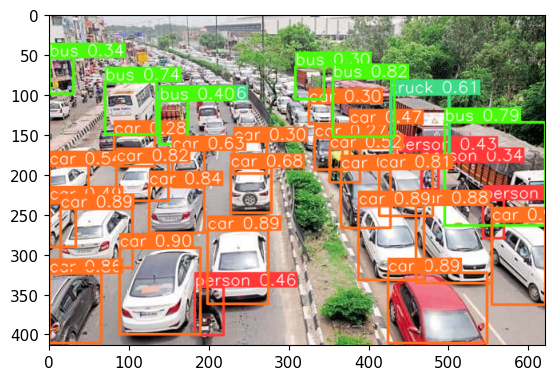

In [ ]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
results.xyxy

[tensor([[5.54076e+02, 2.59879e+02, 6.21000e+02, 3.63355e+02, 8.99795e-01, 2.00000e+00],
         [8.86343e+01, 2.92732e+02, 1.89487e+02, 4.00858e+02, 8.99247e-01, 2.00000e+00],
         [3.87741e+02, 2.39421e+02, 4.69321e+02, 3.32949e+02, 8.89908e-01, 2.00000e+00],
         [1.98772e+02, 2.70341e+02, 2.74827e+02, 3.62576e+02, 8.89433e-01, 2.00000e+00],
         [4.24741e+02, 3.23515e+02, 5.48503e+02, 4.11171e+02, 8.86851e-01, 2.00000e+00],
         [1.40833e+01, 2.43060e+02, 1.04430e+02, 3.17683e+02, 8.86623e-01, 2.00000e+00],
         [4.59067e+02, 2.38058e+02, 5.54816e+02, 3.36651e+02, 8.81141e-01, 2.00000e+00],
         [0.00000e+00, 3.24023e+02, 6.52220e+01, 4.11791e+02, 8.57234e-01, 2.00000e+00],
         [1.25426e+02, 2.14738e+02, 1.94627e+02, 2.73932e+02, 8.35948e-01, 2.00000e+00],
         [8.49731e+01, 1.85681e+02, 1.49722e+02, 2.33261e+02, 8.16364e-01, 2.00000e+00],
         [3.55173e+02, 8.07005e+01, 4.32047e+02, 1.53587e+02, 8.15963e-01, 5.00000e+00],
         [4.13896e+02

In [ ]:
np.array(results.render()).shape

(1, 414, 621, 3)

In [ ]:
np.squeeze(results.render()).shape

(414, 621, 3)

In [ ]:
!pwd

/content/drive/MyDrive/VisionIsAllYouNeed/YOLO/Drowsiness_Detection_using_YOLOv5/yolov5


In [ ]:
!python train.py --img 320 --batch 16 --epochs 50 --data data.yaml --weights yolov5s.pt --workers 2

2024-03-25 20:15:09.402162: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-25 20:15:09.402224: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-25 20:15:09.404063: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optim

In [ ]:
%load_ext tensorboard
%tensorboard --logdir runs